# Imports

In [54]:
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import TimeSeriesSplit

# Load DataFrame

In [55]:
df = pd.read_csv('../../raw_data/df.csv')
df = df.drop(columns='Unnamed: 0')
df['Day'] = pd.to_datetime(df['Day'])
df.set_index('Day', inplace=True)
df = df.rename(columns={"fb_costs": "facebook", "google_costs": "google", "tt_costs": "tiktok"})
df = df.drop(columns = ['fb_impressions', 'fb_clicks', 'google_impressions', 'google_clicks', 'tt_impressions', 'tt_clicks'])

# Split Data

In [56]:
n_splits = 5  # Number of splits for cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

for train_index, test_index in tscv.split(df):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

y_train = train_df['total_sales']
X_train = train_df.drop(columns = ['total_sales', 'orders'])

y_test = test_df['total_sales']
X_test = test_df.drop(columns = ['total_sales', 'orders'])

# Baseline Model

In [57]:
baseline = train_df.shift(1) # baseline['total_sales'] is equivalent to y_pred
baseline = baseline.dropna()

y_pred = baseline['total_sales']
y_true = train_df['total_sales']

# MSE
mse = ((y_true - y_pred) ** 2).mean()

# Calculate TSS (Total Sum of Squares)
mean_y_true = np.mean(y_true)
tss = np.sum((y_true - mean_y_true)**2)

# Calculate RSS (Residual Sum of Squares)
rss = np.sum((y_true - y_pred)**2)

# Calculate R-squared (Coefficient of Determination)
r_squared = 1 - (rss / tss)

f"{mse} is our MSE to beat; {r_squared} is our R squared to beat!"

'595453.442743578 is our MSE to beat; 0.6398209085770498 is our R squared to beat!'

# Check for stationarity

* Stationarity is an assumption in VARIMA modeling

In [67]:
def dickey_fuller(series,title='Your Dataset'):
    '''Hypothesis Test for stationarity '''
    print(f'Augmented Dickey Fuller Test for the dataset {title}')
    
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags','#observations'] # use help(adfuller) to understand why these labels are chosen
    
    outcome = pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        outcome[f'critical value ({key})'] = val
        
    print(outcome.to_string()) # this will not print the line 'dtype:float64'
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis') # Ho is Data is not stationary, check help(adfuller)
        print('Reject the null hypothesis')
        print('Data is Stationary')
    else:
        print('Weak evidence against the Null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non stationary')

In [69]:
dickey_fuller(df['total_sales'], title = 'Total Sales')

Augmented Dickey Fuller Test for the dataset Total Sales
ADF test statistics      -1.651410
p-value                   0.456305
#lags                    21.000000
#observations           763.000000
critical value (1%)      -3.438950
critical value (5%)      -2.865335
critical value (10%)     -2.568791
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [70]:
dickey_fuller(df['facebook'], title = 'Total Sales')

Augmented Dickey Fuller Test for the dataset Total Sales
ADF test statistics      -4.973426
p-value                   0.000025
#lags                    21.000000
#observations           763.000000
critical value (1%)      -3.438950
critical value (5%)      -2.865335
critical value (10%)     -2.568791
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [71]:
dickey_fuller(df['google'], title = 'Total Sales')

Augmented Dickey Fuller Test for the dataset Total Sales
ADF test statistics      -1.878993
p-value                   0.342007
#lags                    21.000000
#observations           763.000000
critical value (1%)      -3.438950
critical value (5%)      -2.865335
critical value (10%)     -2.568791
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [72]:
dickey_fuller(df['tiktok'], title = 'Total Sales')

Augmented Dickey Fuller Test for the dataset Total Sales
ADF test statistics      -3.433203
p-value                   0.009878
#lags                     1.000000
#observations           783.000000
critical value (1%)      -3.438729
critical value (5%)      -2.865238
critical value (10%)     -2.568739
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [ ]:
# total sales and google are non-stationary, but we want the dataframe to maintain its shape so we will diff all of it

In [74]:
df_diff = df.diff().dropna()

In [75]:
dickey_fuller(df_diff['total_sales'],title='Total Sales 1st Order Diff')

Augmented Dickey Fuller Test for the dataset Total Sales 1st Order Diff
ADF test statistics    -6.302206e+00
p-value                 3.390501e-08
#lags                   2.000000e+01
#observations           7.630000e+02
critical value (1%)    -3.438950e+00
critical value (5%)    -2.865335e+00
critical value (10%)   -2.568791e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [76]:
dickey_fuller(df_diff['facebook'],title='Facebook 1st Order Diff')

Augmented Dickey Fuller Test for the dataset Facebook 1st Order Diff
ADF test statistics    -5.988337e+00
p-value                 1.770053e-07
#lags                   2.100000e+01
#observations           7.620000e+02
critical value (1%)    -3.438961e+00
critical value (5%)    -2.865340e+00
critical value (10%)   -2.568794e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [77]:
dickey_fuller(df_diff['google'],title='Google 1st Order Diff')

Augmented Dickey Fuller Test for the dataset Google 1st Order Diff
ADF test statistics    -6.571811e+00
p-value                 7.901661e-09
#lags                   2.000000e+01
#observations           7.630000e+02
critical value (1%)    -3.438950e+00
critical value (5%)    -2.865335e+00
critical value (10%)   -2.568791e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [78]:
dickey_fuller(df_diff['tiktok'],title='Tiktok 1st Order Diff')

Augmented Dickey Fuller Test for the dataset Tiktok 1st Order Diff
ADF test statistics     -26.211633
p-value                   0.000000
#lags                     0.000000
#observations           783.000000
critical value (1%)      -3.438729
critical value (5%)      -2.865238
critical value (10%)     -2.568739
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [79]:
# Data is stationary!

# Check for seasonality

In [64]:
ts = train_df['total_sales']

In [ ]:
# lower AIC = better

In [66]:
import pmdarima as pm

smodel = pm.auto_arima(ts, seasonal=True, m=7, 
                       start_p=20, max_p=30, max_d=1, start_q=8, max_q=15,
                       start_P=3, max_P=8, max_D=1, start_Q=8, max_Q=15, 
                       trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(6,1,6)(3,0,8)[7] intercept   : AIC=10400.408, Time=70.79 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=10556.234, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=10497.322, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=10471.380, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=10554.262, Time=0.01 sec
 ARIMA(6,1,6)(2,0,8)[7] intercept   : AIC=10398.263, Time=66.68 sec
 ARIMA(6,1,6)(1,0,8)[7] intercept   : AIC=10396.563, Time=65.53 sec
 ARIMA(6,1,6)(0,0,8)[7] intercept   : AIC=10394.762, Time=62.36 sec
 ARIMA(6,1,6)(0,0,7)[7] intercept   : AIC=10393.142, Time=50.59 sec
 ARIMA(6,1,6)(0,0,6)[7] intercept   : AIC=10391.329, Time=30.99 sec
 ARIMA(6,1,6)(0,0,5)[7] intercept   : AIC=10390.273, Time=26.64 sec
 ARIMA(6,1,6)(0,0,4)[7] intercept   : AIC=10388.289, Time=16.96 sec
 ARIMA(6,1,6)(0,0,3)[7] intercept   : AIC=10386.365, Time=14.01 sec
 ARIMA(6,1,6)(0,0,2)[7] intercept   : AIC=10384.641, Time=8.87 sec
 ARIMA(6,1

In [ ]:
# Best model:  ARIMA(4,1,6)(0,0,0)[7]
# AIC: 10378.788

# Model Identification

* Determine order (p, q) of the autoregressive (AR) and moving average (MA) components for each feature

### ACF
  * The blue cone represents a confidence interval (the default is 95%)

  * Peak inside of cone ➔ not statistically significant

### PACF
  * The PACF plot provides insights into the direct correlation between a specific lagged data point and the current data point while removing the influence of intermediate lags

## Total Sales

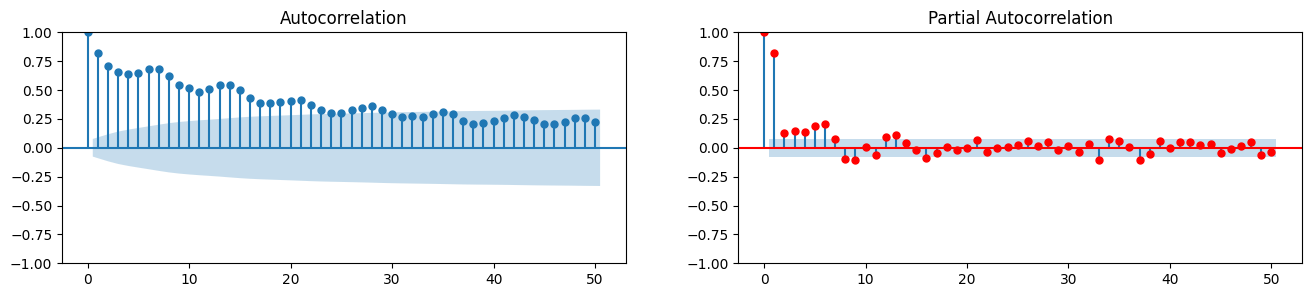

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,3))

plot_acf(train_df.total_sales, lags=50, ax=axes[0]); #q
plot_pacf(train_df.total_sales, lags=50, ax=axes[1], color='r'); #p

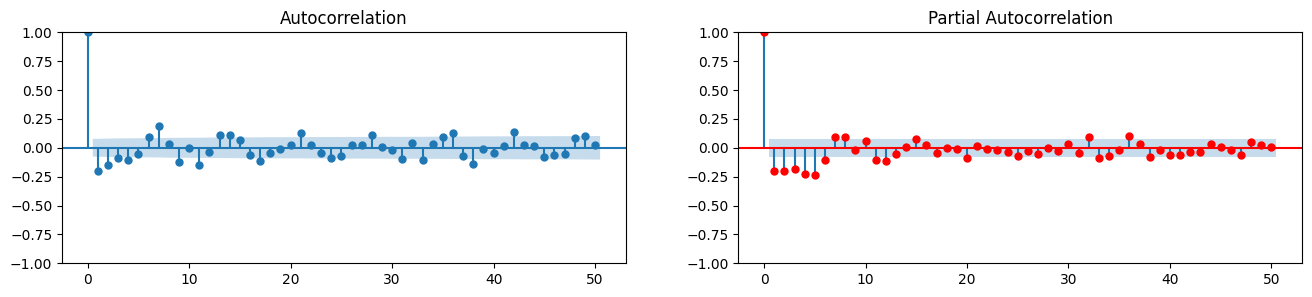

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,3))

plot_acf(train_df.total_sales.diff().dropna(), lags=50, ax=axes[0]); #q
plot_pacf(train_df.total_sales.diff().dropna(), lags=50, ax=axes[1], color='r'); #p

## Facebook

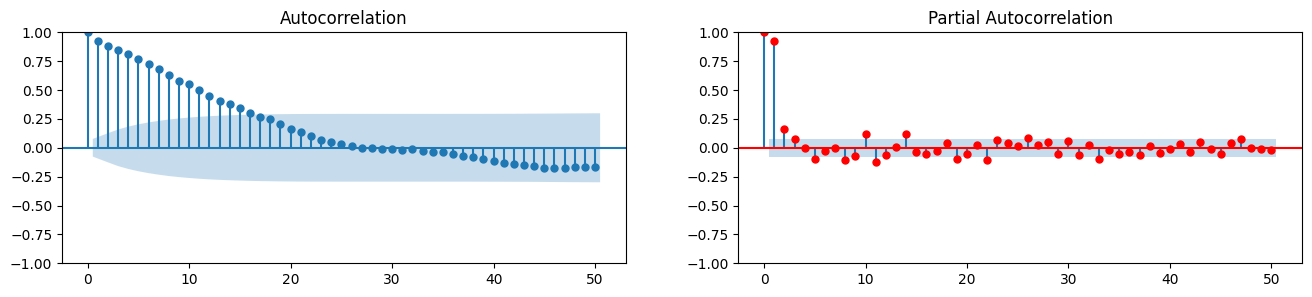

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,3))

plot_acf(train_df.facebook, lags=50, ax=axes[0]);
plot_pacf(train_df.facebook, lags=50, ax=axes[1], color='r');

## Google

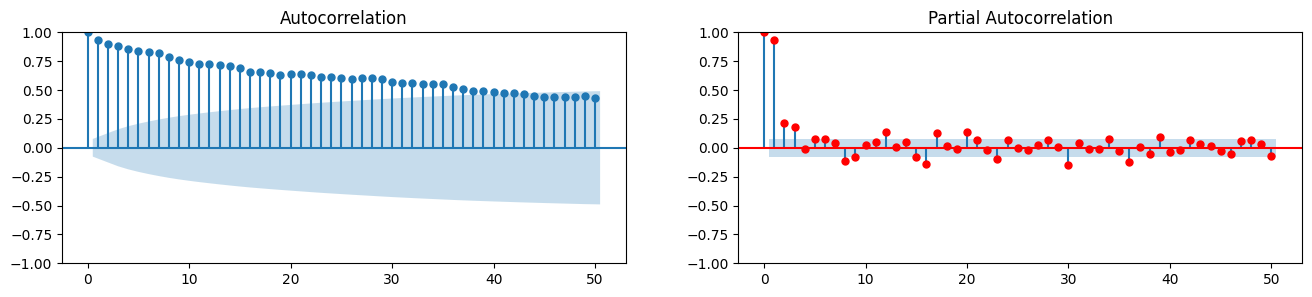

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,3))

plot_acf(train_df.google, lags=50, ax=axes[0]);
plot_pacf(train_df.google, lags=50, ax=axes[1], color='r');

## Tiktok

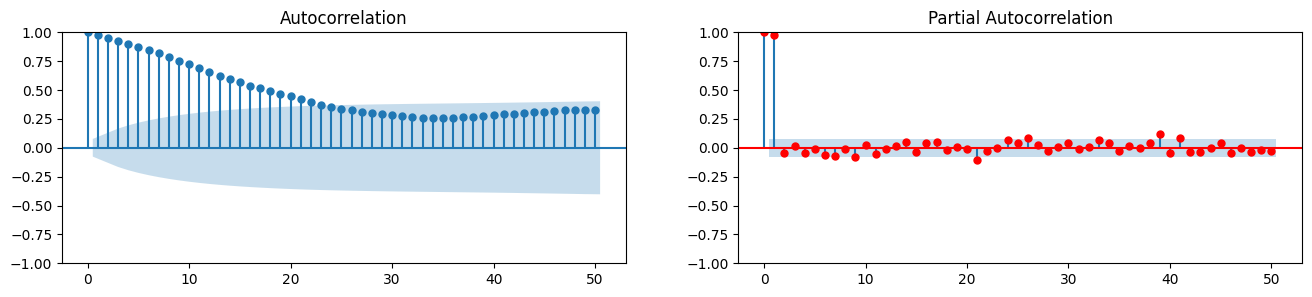

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,3))

plot_acf(train_df.tiktok, lags=50, ax=axes[0]);
plot_pacf(train_df.tiktok, lags=50, ax=axes[1], color='r');